In [131]:
# Data manipulation
import pandas as pd
import numpy as np

# Data sourcing
import yfinance as yf

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Model evaluation
from scipy.stats import shapiro

In [36]:
# Load business and recommendation data
business_df = pd.read_csv("Data/businiess_df.csv")
recommendation_df = pd.read_csv("Data/recommendation_df.csv")

C:\Users\benja\.conda\envs\mlcourse\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,25

In [60]:
# Load sustainable data
sustain_df = pd.read_csv("Data/sustain_df.csv")
sustain_df.rename(columns={"Unnamed: 0": "symbol"}, inplace= True)
sustain_df.set_index("symbol", inplace = True, drop = False)
sustain_df.index.names = ["Index"]
sustain_df.head(2)

,symbol,palmOil,controversialWeapons,gambling,socialScore,nuclear,furLeather,alcoholic,gmo,catholic,...,esgPerformance,coal,pesticides,adult,percentile,peerGroup,smallArms,environmentScore,governancePercentile,militaryContract
Index,,,,,,,,,,,,,,,,,,,,,
MMM,MMM,False,False,False,13.60,False,False,False,False,False,...,LEAD_PERF,False,False,False,75.51,Industrial Conglomerates,False,13.20,0.0,False
ABT,ABT,False,False,False,13.54,False,False,False,False,True,...,AVG_PERF,False,False,False,44.64,Healthcare,False,3.03,NaN,False


## Multiple Linear Regression

### Data Exploration

In [88]:
x_lable_sustain = ["symbol","environmentScore","socialScore","governanceScore"]
sustain = sustain_df[x_lable_sustain].sort_index()
sustain.head(), sustain.shape

(      symbol  environmentScore  socialScore  governanceScore
 Index                                                       
 A          A              0.87         9.44             6.26
 AAL      AAL             11.76        12.65             5.40
 AAP      AAP              0.10         9.14             3.33
 AAPL    AAPL              0.29         7.99             8.64
 ABBV    ABBV              0.65        16.64            10.10,
 (448, 4))

<AxesSubplot:>

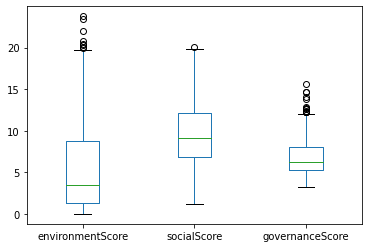

In [89]:
sustain[x_lable_sustain].reset_index(drop = True).plot.box()

In [92]:
linear_reg_df = sustain.merge(business_df[["symbol","profitMargins"]], how = "inner", on = "symbol")
linear_reg_df.head()

,symbol,environmentScore,socialScore,governanceScore,profitMargins
0,A,0.87,9.44,6.26,0.19148
1,AAL,11.76,12.65,5.40,-0.13229
2,AAP,0.10,9.14,3.33,0.05895
3,AAPL,0.29,7.99,8.64,0.25882
4,ABBV,0.65,16.64,10.10,0.13656


In [94]:
x = linear_reg_df.drop(["symbol","profitMargins"],axis=1)
y = linear_reg_df["profitMargins"]

In [127]:
ols_mod = sm.OLS(y,x)
ols_res = ols_mod.fit()
ols_resid = ols_res.resid
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          profitMargins   R-squared (uncentered):                   0.381
Model:                            OLS   Adj. R-squared (uncentered):              0.376
Method:                 Least Squares   F-statistic:                              91.14
Date:                Tue, 05 Apr 2022   Prob (F-statistic):                    5.41e-46
Time:                        11:49:54   Log-Likelihood:                          117.74
No. Observations:                 448   AIC:                                     -229.5
Df Residuals:                     445   BIC:                                     -217.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
environmentScore    -0.0032      0.002     -2.077      0.038      -0.006      -0.000
socialScore          0.0022      0.002      0.908      0.365      -0.003       0.007
governanceScore      0.0193      0.003      5.907      0.000       0.013       0.026
==============================================================================
Omnibus:                      359.916   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29188.732
Skew:                           2.785   Prob(JB):                         0.00
Kurtosis:                      42.149   Cond. No.                         6.04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

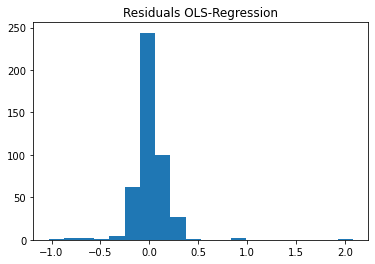

In [136]:
plt.hist(ols_resid, bins= 20)
plt.title("Residuals OLS-Regression");

In [133]:
stat, p = shapiro(ols_resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.720, p=0.000


#### Sources of endogeneity
- Omitted variables
- Measurement Error
- Simultaneity in simultaneous equation models
- Autocorrelation in Dynamic Models
 